In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [ ]:
data = pd.read_csv('C:/Users/admin/Intern/DataSets/BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
data.shape

(537577, 12)

In [4]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
# we dont want user id for purchase pridiction
data = data.drop(columns='User_ID')

In [6]:
null_col = [val for val in data.columns if data[val].isna().sum()>0]
null_col

['Product_Category_2', 'Product_Category_3']

In [7]:
# null values
data[null_col].isna().sum()

Product_Category_2    166986
Product_Category_3    373299
dtype: int64

In [8]:
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [9]:
data['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [10]:
# filling null values with 0 or fill with Mode
data.fillna(0, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  537577 non-null  object 
 1   Gender                      537577 non-null  object 
 2   Age                         537577 non-null  object 
 3   Occupation                  537577 non-null  int64  
 4   City_Category               537577 non-null  object 
 5   Stay_In_Current_City_Years  537577 non-null  object 
 6   Marital_Status              537577 non-null  int64  
 7   Product_Category_1          537577 non-null  int64  
 8   Product_Category_2          537577 non-null  float64
 9   Product_Category_3          537577 non-null  float64
 10  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 45.1+ MB


In [12]:
data.select_dtypes(include=['int64', 'float64']).head(2)

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,10,0,3,0.0,0.0,8370
1,10,0,1,6.0,14.0,15200


In [13]:
# converting data into int64
data.Product_Category_2 = data.Product_Category_2.astype('int64')
data.Product_Category_3 = data.Product_Category_3.astype('int64')

In [14]:
data.select_dtypes(include='object').head(2)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2


In [15]:
# mapping gender col into F:0 and M:1
data.Gender = data.Gender.map({'F':0, 'M':1})

In [16]:
data.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,0,0,8370
1,P00248942,0,0-17,10,A,2,0,1,6,14,15200


In [17]:
#  object
data.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [18]:
sum(data.duplicated())

73

In [19]:
#dropping duplicates
data.drop_duplicates(inplace=True)

visulization

In [20]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,0,0,8370
1,P00248942,0,0-17,10,A,2,0,1,6,14,15200
2,P00087842,0,0-17,10,A,2,0,12,0,0,1422
3,P00085442,0,0-17,10,A,2,0,12,14,0,1057
4,P00285442,1,55+,16,C,4+,0,8,0,0,7969


In [21]:
#  which age group is buying more products
age = data.groupby('Age')['Age'].count()
print(age)

Age
0-17      14706
18-25     97610
26-35    214658
36-45    107489
46-50     44523
51-55     37615
55+       20903
Name: Age, dtype: int64


In [22]:
# average purchase of each group
avg = data.groupby('Age')['Purchase'].mean()
print(avg)

Age
0-17     9020.377057
18-25    9235.852331
26-35    9314.538755
36-45    9401.508145
46-50    9284.978663
51-55    9620.771341
55+      9453.898579
Name: Purchase, dtype: float64


In [23]:
df = pd.DataFrame({'Age': age.index, 'Avg': avg.values})
df

,Age,Avg
0,0-17,9020.377057
1,18-25,9235.852331
2,26-35,9314.538755
3,36-45,9401.508145
4,46-50,9284.978663
5,51-55,9620.771341
6,55+,9453.898579


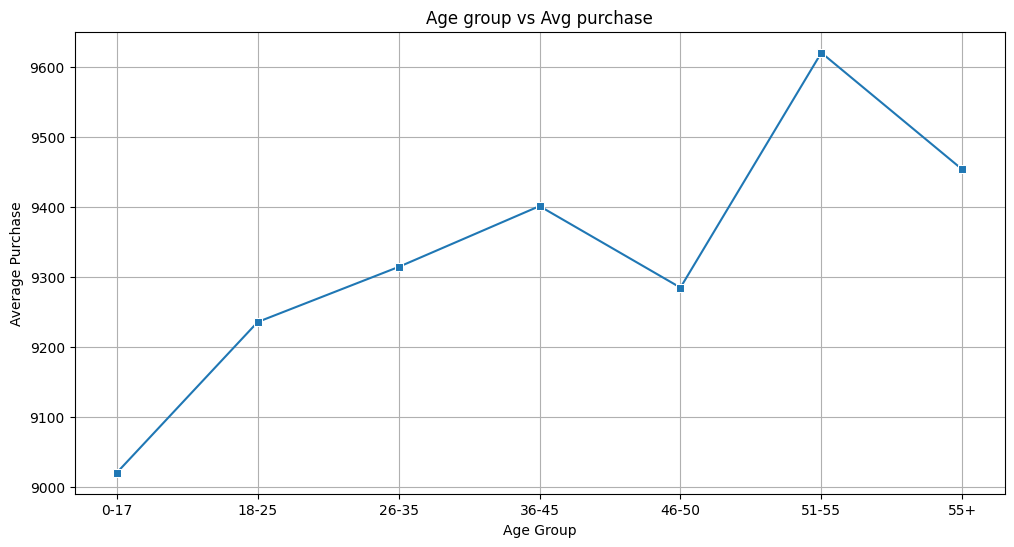

In [24]:
fig = plt.figure(figsize=(12,6))
sns.lineplot(x='Age', y='Avg', data=df, marker='s')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase')
plt.title('Age group vs Avg purchase')
plt.grid()
plt.show()

Observation

People of Age group 51-55 have spent more on purchase. Approximately 9600$ on average spent by People between age 51-55.

The graph values tends to increase. so higher the age group higher the intrest in the sale.But there is a slight purchase variation in 46-50 and 50-55 age people.

In [25]:
data.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,0,0,8370
1,P00248942,0,0-17,10,A,2,0,1,6,14,15200


In [26]:
# which group has higher visiting rate
age_grp = data.groupby('Age')['Age'].count()
sex = data.groupby('Gender')['Gender'].count()

age_data = pd.DataFrame({'Age': age_grp.index, 'Count':age_grp.values})
sex_data = pd.DataFrame({'Sex': sex.index, 'Count': sex.values})
print(age_data)
print(sex_data)

     Age   Count
0   0-17   14706
1  18-25   97610
2  26-35  214658
3  36-45  107489
4  46-50   44523
5  51-55   37615
6    55+   20903
   Sex   Count
0    0  132188
1    1  405316


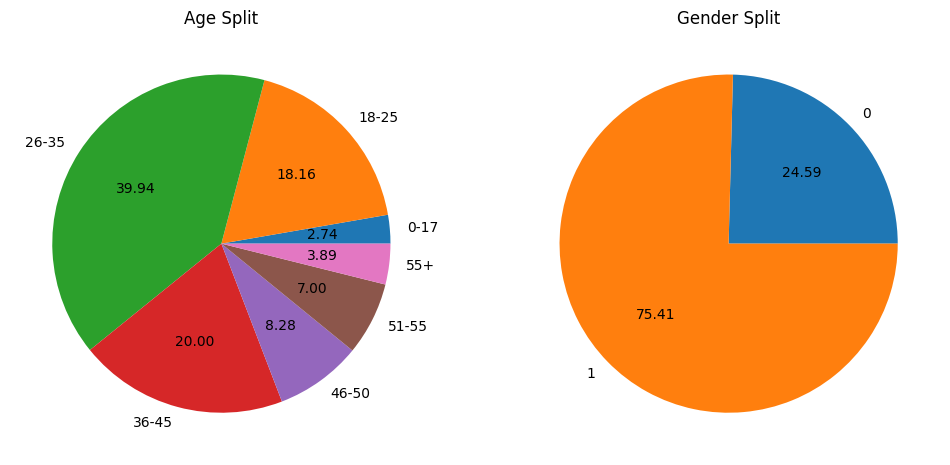

In [27]:
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.pie(age_data['Count'], labels=age_data['Age'], autopct='%.2f')
plt.title("Age Split")
plt.subplot(122)
plt.pie(sex_data['Count'], labels=sex_data['Sex'], autopct='%.2f')
plt.title("Gender Split")
plt.show()

Observation

If we check the second pie, By this stat we can tell that the store gets most of the male customers (75.4% male 24.6% Female).

Now to the first Pie this will give intresting understanding when we comapre it with first question solution.

This shows 40% of customers are 26-35 age group and 20% are from 36-45 => 60% of customers from 26-45 age group.
only 7% of customers are of 51-55 Age group.

In [28]:
#  occupation
data_occup = data.Occupation.value_counts()
print(data.Occupation.unique())
print(data_occup)

[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
Occupation
4     70835
0     68101
7     57795
1     45971
17    39085
20    32909
12    30421
14    26710
2     25845
16    24788
6     19820
3     17366
10    12622
5     11984
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: count, dtype: int64


Text(0.5, 1.0, 'Spread of occupation types in the sale')

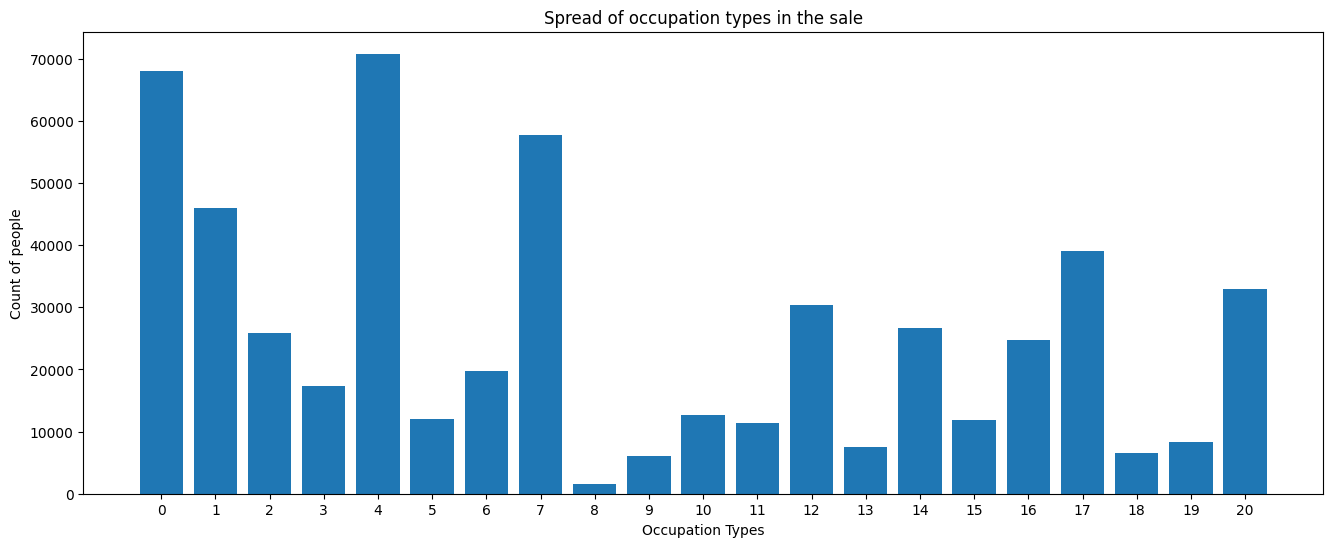

In [29]:
plt.figure(figsize = (16,6))
plt.bar(data_occup.index,data_occup.values)
plt.xticks(data_occup.index)
plt.xlabel('Occupation Types')
plt.ylabel('Count of people')
plt.title('Spread of occupation types in the sale')

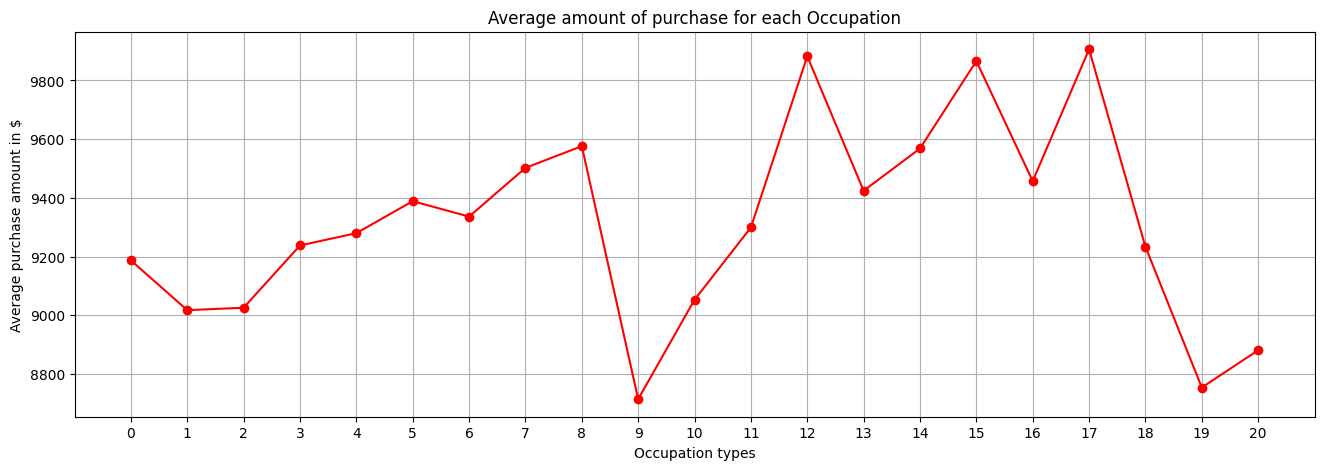

In [31]:
avg_occoup_purchase = data.groupby('Occupation')['Purchase'].mean()
plt.figure(figsize=(16,5))
plt.grid()
plt.plot(avg_occoup_purchase.index, avg_occoup_purchase.values,'ro-')
plt.xlabel('Occupation types')
plt.ylabel('Average purchase amount in $')
plt.title('Average amount of purchase for each Occupation')
plt.xticks(avg_occoup_purchase.index)
plt.show()